<a href="https://colab.research.google.com/github/agargi007/PDS/blob/main/SKILL_experiment_8%269.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Feature selection is a crucial step in the data preprocessing pipeline, especially when dealing with large datasets that contain multiple features. The goal of feature selection is to identify the most relevant features for building a predictive model. By doing so, you reduce the dimensionality of the dataset, improve model accuracy, and reduce overfitting.

In your dataset, which contains information about housing values in California, the goal is likely to predict median_house_value_category (the target variable, which is categorical, representing different house value ranges). The features, such as longitude, latitude, housing_median_age, total_rooms, etc., are numerical and may have varying degrees of relevance to the target.

There are different methods for performing feature selection, and for your dataset, two of the most useful ones are:

Correlation Matrix: Measures the linear relationship between each feature and the target variable.

Mutual Information (Information Gain): Measures the amount of information a feature provides about the target variable.


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
# Step 2: Load the dataset
df = pd.read_csv("/content/sample_data/california_housing_test.csv")

# Define features (X) and target (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']


In [ ]:
# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (2400, 8)
X_test shape: (600, 8)
y_train shape: (2400,)
y_test shape: (600,)


In [ ]:
# Step 4: Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_regression, k='all')  # or specify a number like k=5 for top 5 features
X_new = selector.fit_transform(X_train, y_train)

# Get feature scores
scores = pd.Series(selector.scores_, index=X_train.columns)
selected_features = scores.sort_values(ascending=False)

print("Feature Scores (Higher = More Important):")
print(selected_features)


Feature Scores (Higher = More Important):
median_income         1895.586623
total_rooms             54.501658
latitude                47.217686
households              20.618493
housing_median_age      19.288404
total_bedrooms          12.777159
longitude                5.900654
population               0.327172
dtype: float64


 ANOVA (Analysis of Variance)
Concept:
ANOVA is a statistical method used to test if there are significant differences between the means of three or more independent groups. It is useful when the feature you are testing is categorical (with more than two categories), and the target is continuous.

Null Hypothesis (H₀): The means of the different groups are equal.

Alternative Hypothesis (H₁): At least one group mean is different.

How ANOVA Works:
ANOVA compares the variance between groups to the variance within each group:

Between-group variance: Measures how much the group means differ from the overall mean.

Within-group variance: Measures how much individual data points within each group deviate from their group mean.

A significant difference in group means (i.e., a small p-value) suggests that the feature is useful for predicting the target variable, whereas a large p-value suggests the feature does not provide much useful information.

Use in Your Dataset:
In your dataset, ANOVA can be used when the target variable is categorical, like median_house_value_category, and the features are continuous, such as total_rooms, population, or median_income. The goal is to determine which continuous features differ significantly across different house value categories.

When to Use:
Target Variable (y): Categorical (e.g., median_house_value_category).

Features (X): Continuous (e.g., total_rooms, population).

Key Formula:
The F-statistic is calculated as:

𝐹
=
Between-group variance
Within-group variance
F=
Within-group variance
Between-group variance
​

If the F-statistic is large and the p-value is small (typically below 0.05), you reject the null hypothesis, indicating that the feature is likely to be relevant.

<ipython-input-5-6fe9570b7ff0>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette='Reds_d')


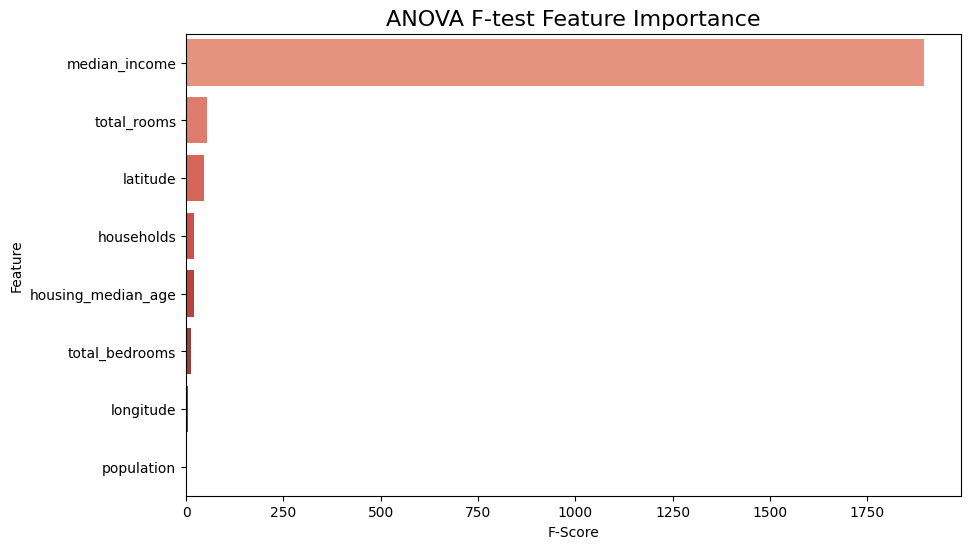

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression

# Perform feature selection using ANOVA (F-test)
selector = SelectKBest(score_func=f_regression, k='all')  # Select all features
X_new = selector.fit_transform(X_train, y_train)

# Get the F-scores
scores = pd.Series(selector.scores_, index=X_train.columns)

# Sort the scores in descending order
sorted_scores = scores.sort_values(ascending=False)

# Visualize the scores using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_scores.values, y=sorted_scores.index, palette='Reds_d')
plt.title('ANOVA F-test Feature Importance', fontsize=16)
plt.xlabel('F-Score')
plt.ylabel('Feature')
plt.show()


In [ ]:

print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'median_house_value_category'],
      dtype='object')


Chi-Squared Test
Concept:
The Chi-Squared test is a statistical method used to test the relationship between two categorical variables. It is often used to determine whether the distribution of one categorical variable is independent of another categorical variable.

Null Hypothesis (H₀): The two categorical variables are independent (no relationship).

Alternative Hypothesis (H₁): The two categorical variables are dependent (there is a relationship).

How Chi-Squared Works:
The Chi-Squared test compares the observed frequencies of categories in a contingency table to the expected frequencies if there were no relationship between the variables.

The Chi-Squared statistic is computed as:

𝜒
2
=
∑
(
𝑂
𝑖
−
𝐸
𝑖
)
2
𝐸
𝑖
χ
2
 =∑
E
i
​

(O
i
​
 −E
i
​
 )
2

​

Where:

𝑂
𝑖
O
i
​
  is the observed frequency.

𝐸
𝑖
E
i
​
  is the expected frequency.

The test gives you a p-value, which you can use to determine whether there is a significant association between the two categorical variables.

Use in Your Dataset:
You can apply the Chi-Squared test to see how well a categorical feature (like ocean_proximity) associates with the target variable (such as median_house_value_category, if it's categorical). If the p-value is small (typically < 0.05), the categorical feature has a significant relationship with the target and may be relevant.

When to Use:
Target Variable (y): Categorical (e.g., median_house_value_category).

Features (X): Categorical (e.g., ocean_proximity).

Key Formula:
The Chi-Squared statistic is computed based on observed vs. expected counts:

𝜒
2
=
∑
(
𝑂
𝑖
−
𝐸
𝑖
)
2
𝐸
𝑖
χ
2
 =∑
E
i
​

(O
i
​
 −E
i
​
 )
2

​

Where the expected count is calculated assuming no association between the variables.

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# Create a contingency table for 'median_house_value_category' and binned 'housing_median_age'
contingency_table = pd.crosstab(df['median_house_value_category'], pd.cut(df['housing_median_age'], bins=5))

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Square Test Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)


Chi-Square Test Statistic: 26.60025802941628
P-value: 0.008818115266568803
Degrees of Freedom: 12
Expected Frequencies Table:
[[ 45.10434783 124.90434783 122.71304348 141.70434783  90.57391304]
 [104.81391304 290.25391304 285.16173913 329.29391304 210.47652174]
 [ 60.82643478 168.44243478 165.48730435 191.09843478 122.1453913 ]
 [ 36.25530435 100.39930435  98.63791304 113.90330435  72.80417391]]


Chi-Square Test Statistic: 26.60025802941628
P-value: 0.008818115266568803


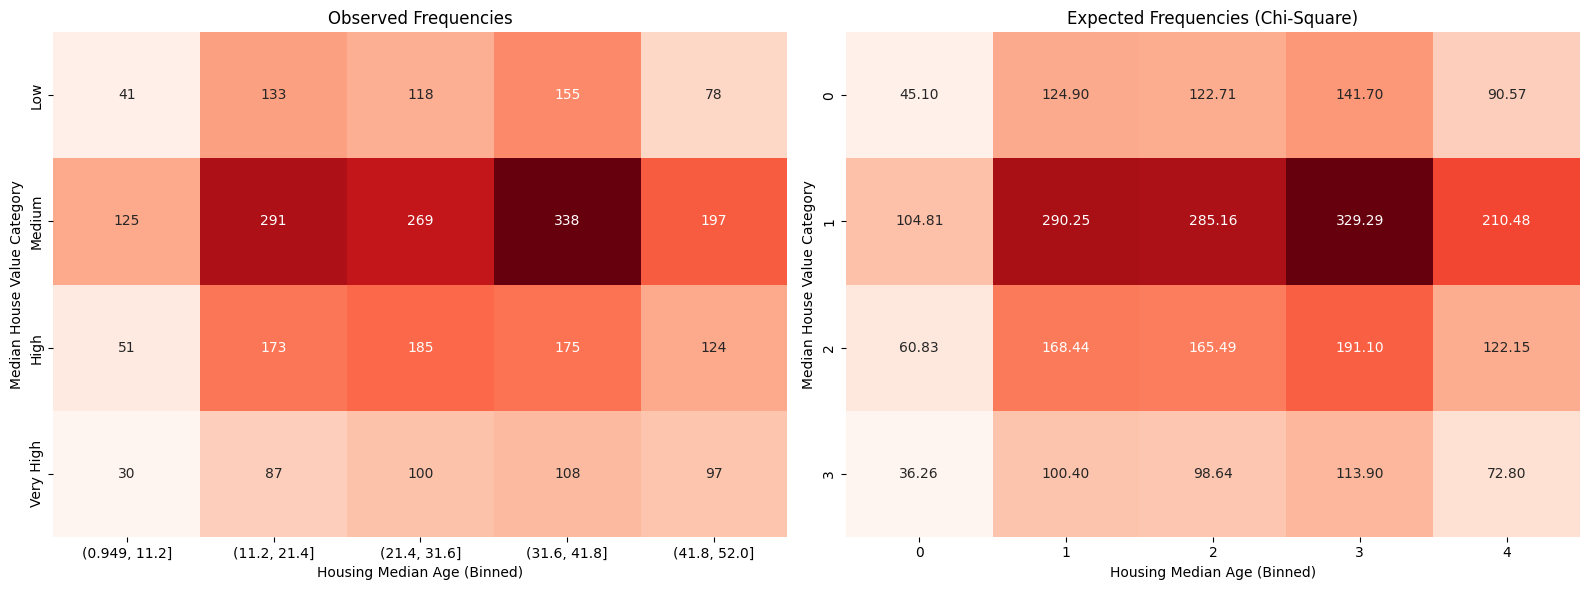

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency

# Create contingency table and perform Chi-Square test
contingency_table = pd.crosstab(df['median_house_value_category'], pd.cut(df['housing_median_age'], bins=5))
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print Chi-Square test results
print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

# Plotting observed and expected frequencies as heatmaps
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Observed Frequencies Heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Reds', cbar=False, ax=axes[0])
axes[0].set_title('Observed Frequencies')
axes[0].set_xlabel('Housing Median Age (Binned)')
axes[0].set_ylabel('Median House Value Category')

# Expected Frequencies Heatmap
sns.heatmap(expected, annot=True, fmt='.2f', cmap='Reds', cbar=False, ax=axes[1])
axes[1].set_title('Expected Frequencies (Chi-Square)')
axes[1].set_xlabel('Housing Median Age (Binned)')
axes[1].set_ylabel('Median House Value Category')

plt.tight_layout()
plt.show()


1. Correlation Matrix (Pearson’s Correlation)
Concept:
Pearson's correlation measures the linear relationship between two continuous variables. It is computed as the covariance of the two variables divided by the product of their standard deviations. The values range from -1 to 1:

1: Perfect positive linear relationship

-1: Perfect negative linear relationship

0: No linear relationship

Use in Your Dataset:
In your dataset, you likely want to know how each feature (e.g., longitude, total_rooms, population) correlates with the target variable, median_house_value_category. Since your target variable is categorical (likely representing house value categories like "High", "Medium", "Low"), we would need to either convert it to numerical form or use other techniques like mutual information. However, Pearson’s correlation is still useful for understanding linear relationships in the dataset for continuous features.

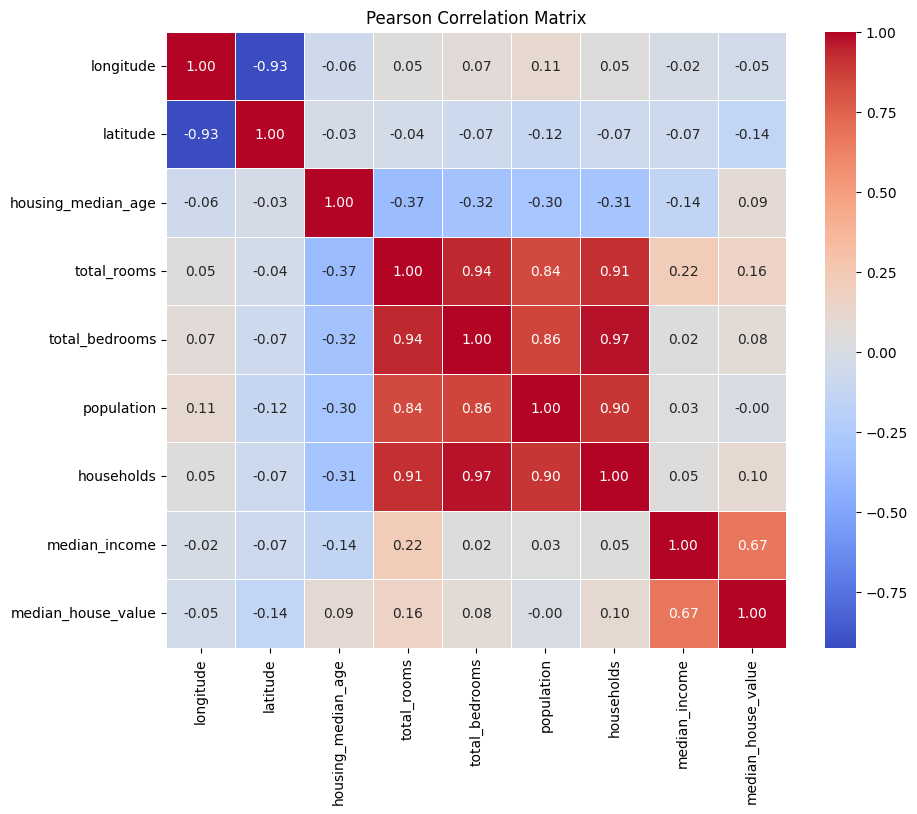

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute Pearson's correlation matrix
correlation_matrix = numerical_df.corr(method='pearson')

# Plotting the Pearson correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()


 Mutual Information (Information Gain)
Concept:
Mutual information measures the amount of information gained about the target variable when we know the value of a feature. Unlike Pearson's correlation, which is limited to linear relationships, mutual information can capture both linear and non-linear relationships. Higher mutual information indicates that the feature provides more information about the target variable.

Use in Your Dataset:
For classification tasks (like predicting median_house_value_category), mutual information is a great way to identify important features. It works with both continuous and categorical data and is not restricted to linear relationships.

In your dataset, mutual information can reveal which features, such as total_rooms, households, or median_income, are most informative for predicting the median_house_value_category. For example, you may find that median_income has high mutual information with median_house_value_category, suggesting it's a strong predictor of house value categories.

<ipython-input-18-4b5ba8a77e48>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=info_gain, y=X.columns, palette='Reds')


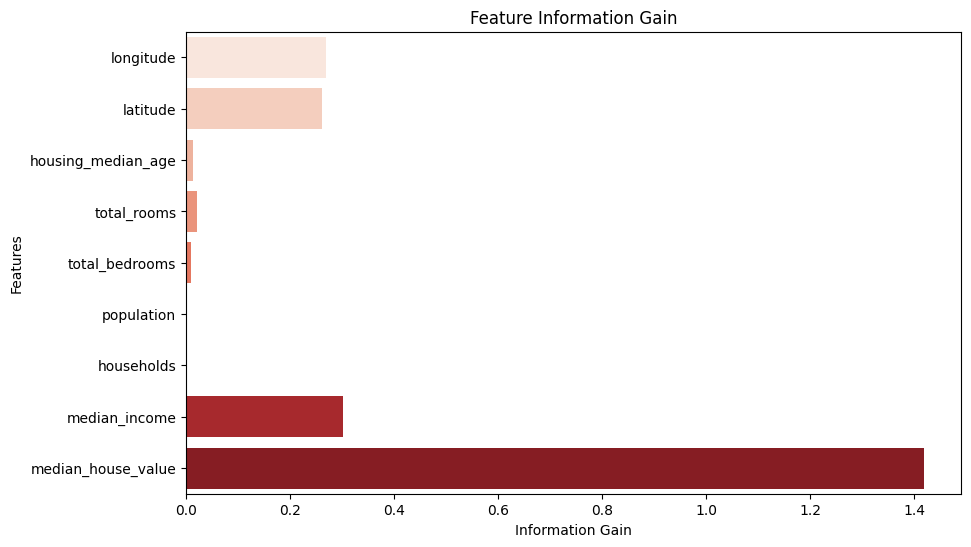

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Convert categorical target to numeric labels (if not already done)
df['median_house_value_category'] = df['median_house_value_category'].astype('category').cat.codes

# Select features (X) and target (y)
X = df.select_dtypes(include=['float64', 'int64'])
y = df['median_house_value_category']

# Compute Mutual Information (Information Gain)
info_gain = mutual_info_classif(X, y)

# Plot Information Gain for each feature
plt.figure(figsize=(10, 6))
sns.barplot(x=info_gain, y=X.columns, palette='Reds')
plt.title('Feature Information Gain')
plt.xlabel('Information Gain')
plt.ylabel('Features')
plt.show()
